In [3]:
import os

import matplotlib.pyplot as plt
import ruptures as rpt
import pandas as pd
from util import generate_sublist

from result_analysis import get_change_point
from result_analysis.gap_tunning import execute_regression

from IPython.display import Markdown, HTML

current_directory = os.path.abspath(os.path.join(os.getcwd(), '../../'))
output_directory = current_directory + '/resources/output/evaluation/incubator/results/'

files = ['2P_exp1_ht3_hg2_2P_Modelexp1_ht3_hg2_Real.csv',
         '4P_exp1_ht3_hg2_4P_Modelexp1_ht3_hg2_Real.csv',
         '2P_exp2_ht20_hg30_2P_Modelexp2_ht20_hg30_Real.csv',
         '4P_exp2_ht20_hg30_4P_Modelexp2_ht20_hg30_Real.csv']

param_interest = 'temperature(degrees)'

params = [f'mad_{param_interest}',
          'init_gap',
          'cont_gap',
          'percentage_matched_snapshots',
          'frechet_euclidean',
          'p2p_mean_euclidean',
          'number_of_gaps',
          'mean_length_gaps_mean']

params_labels = [f'MAD temp (ºC)',
                 'Penalty Opening Gap',
                 'Penalty Extending Gap',
                 '%matched snapshots',
                 'Frèchet euclidean',
                 'Euclidean Avg',
                 'Number of gaps',
                 'Avg length of gaps']

ordering_params = [3, 6]
include_params = [[(0, 5)], [(0, 3), (6, 7)]]
filters = {'affine': ['init_gap', lambda x: x < 0.0],
           'simple' : ['init_gap', lambda x: x == 0.0]}
assert(len(ordering_params) == len(include_params))

text_content = ''

# Scenario 2P exp1 ht3 hg2 2P Modelexp1 ht3 hg2 Real


## Affine Gap


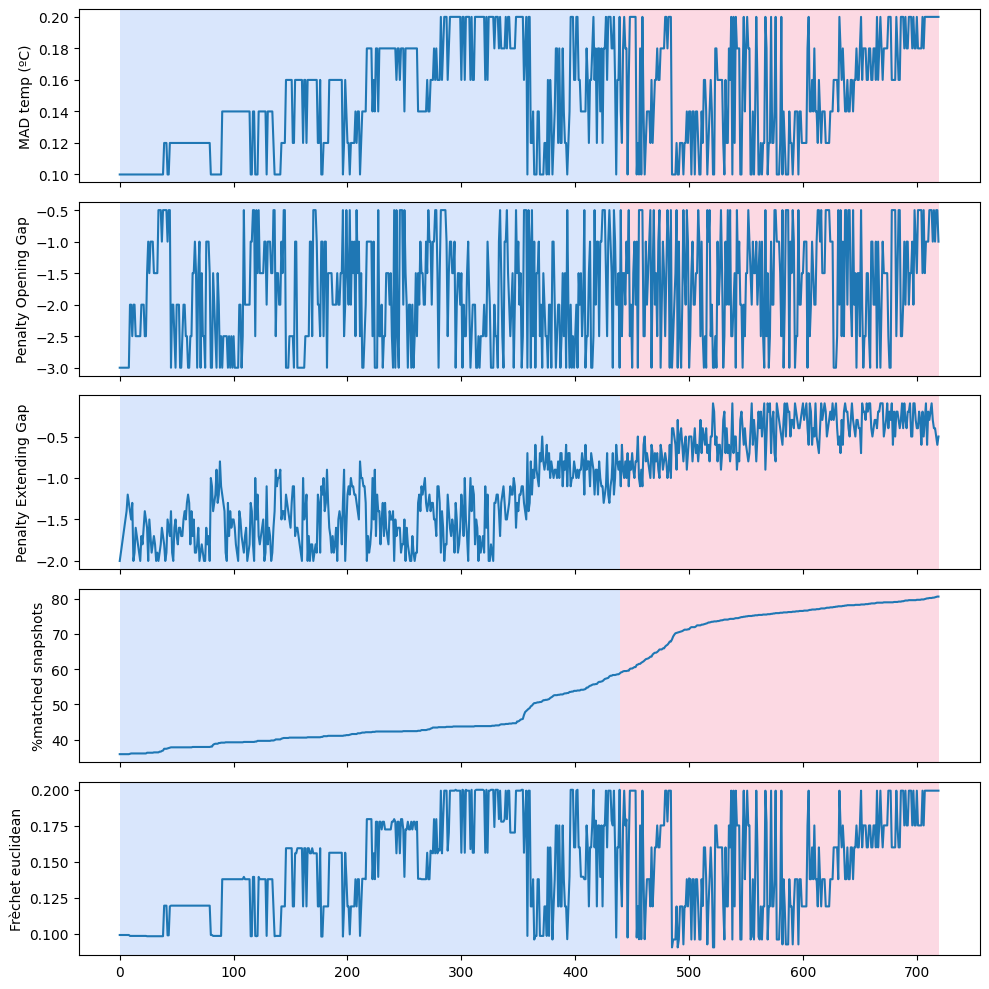

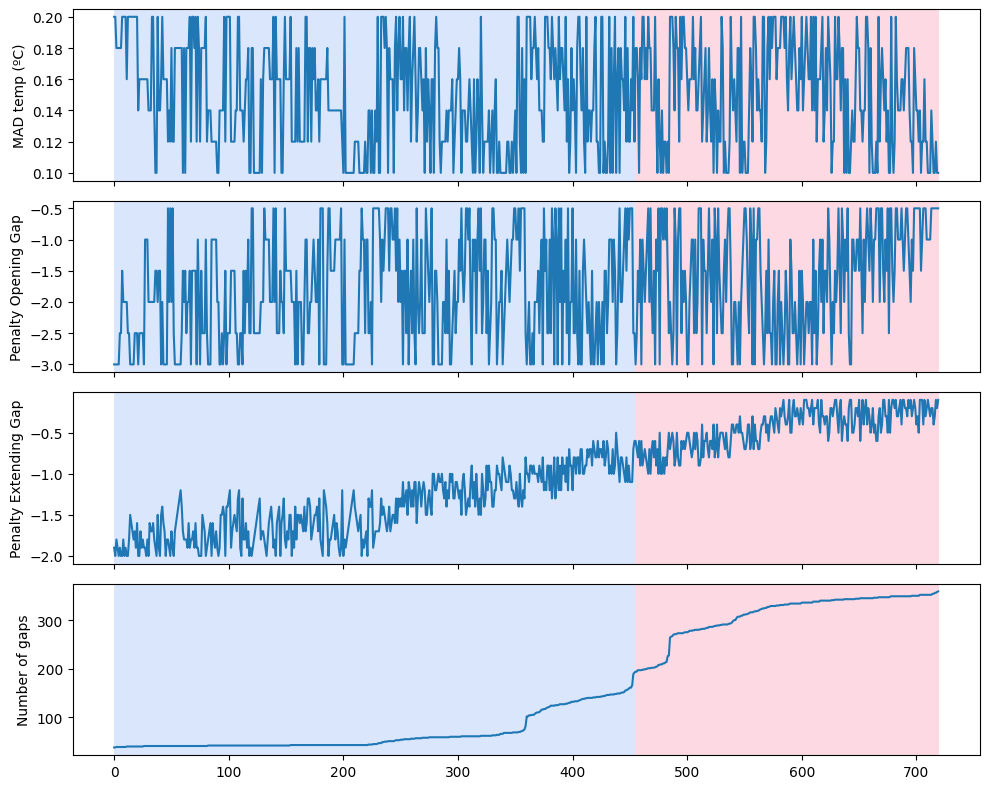

## Simple Gap


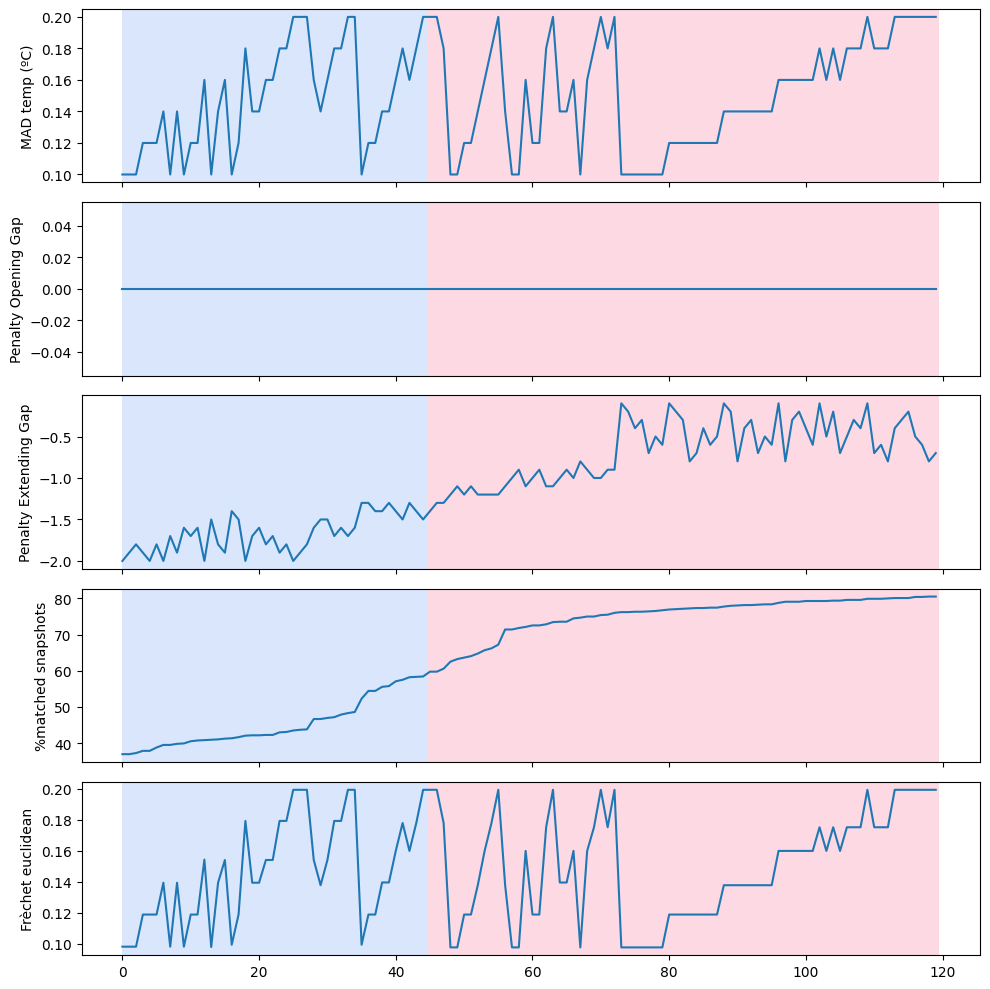

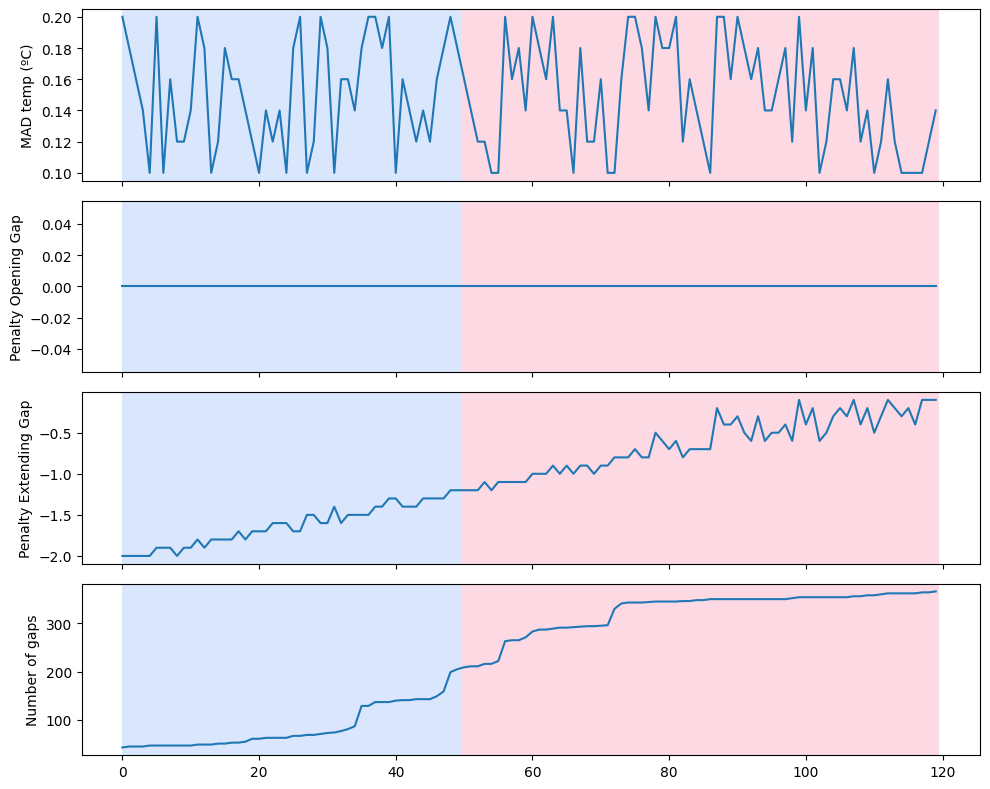

# Scenario 4P exp1 ht3 hg2 4P Modelexp1 ht3 hg2 Real


## Affine Gap


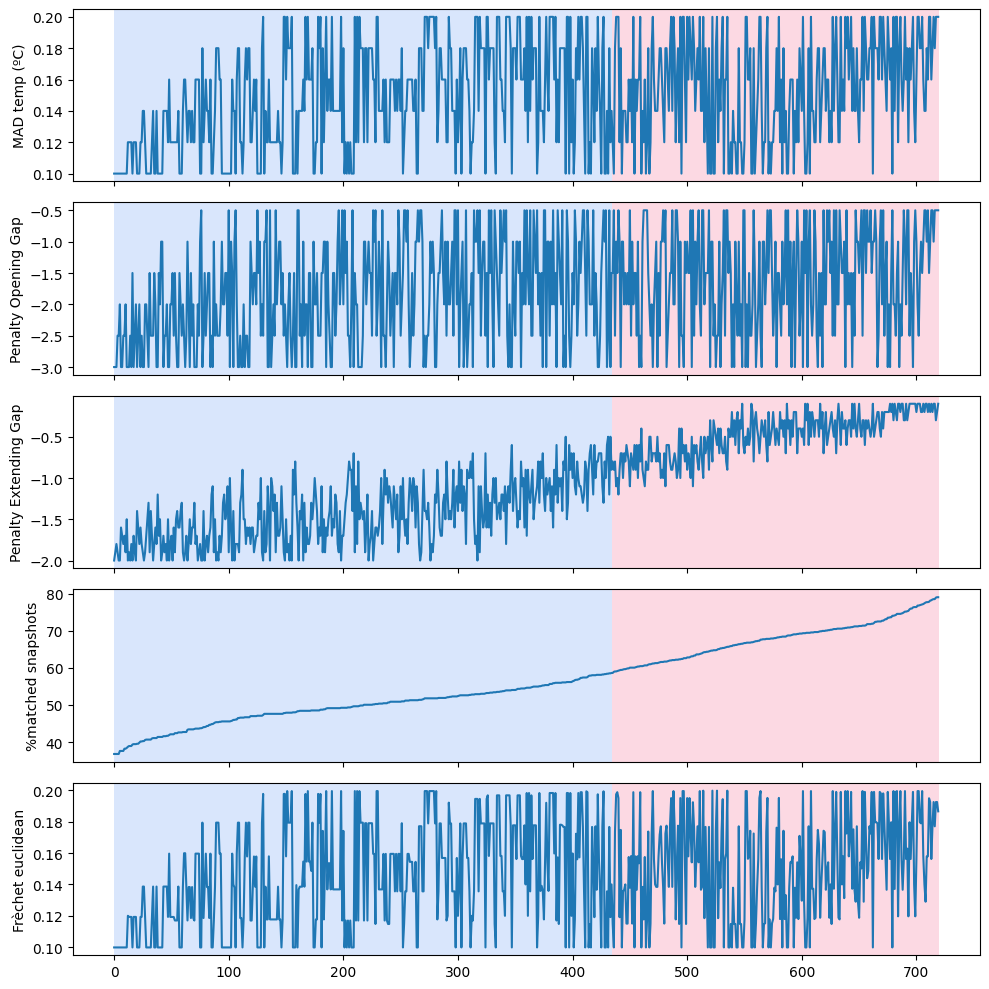

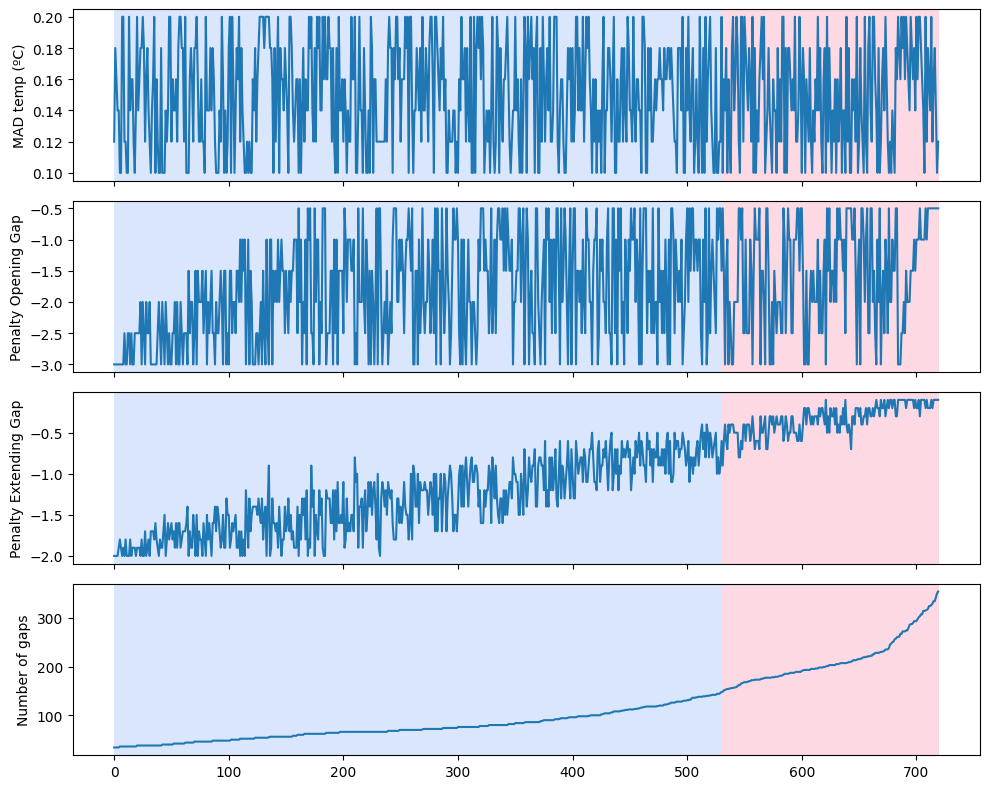

## Simple Gap


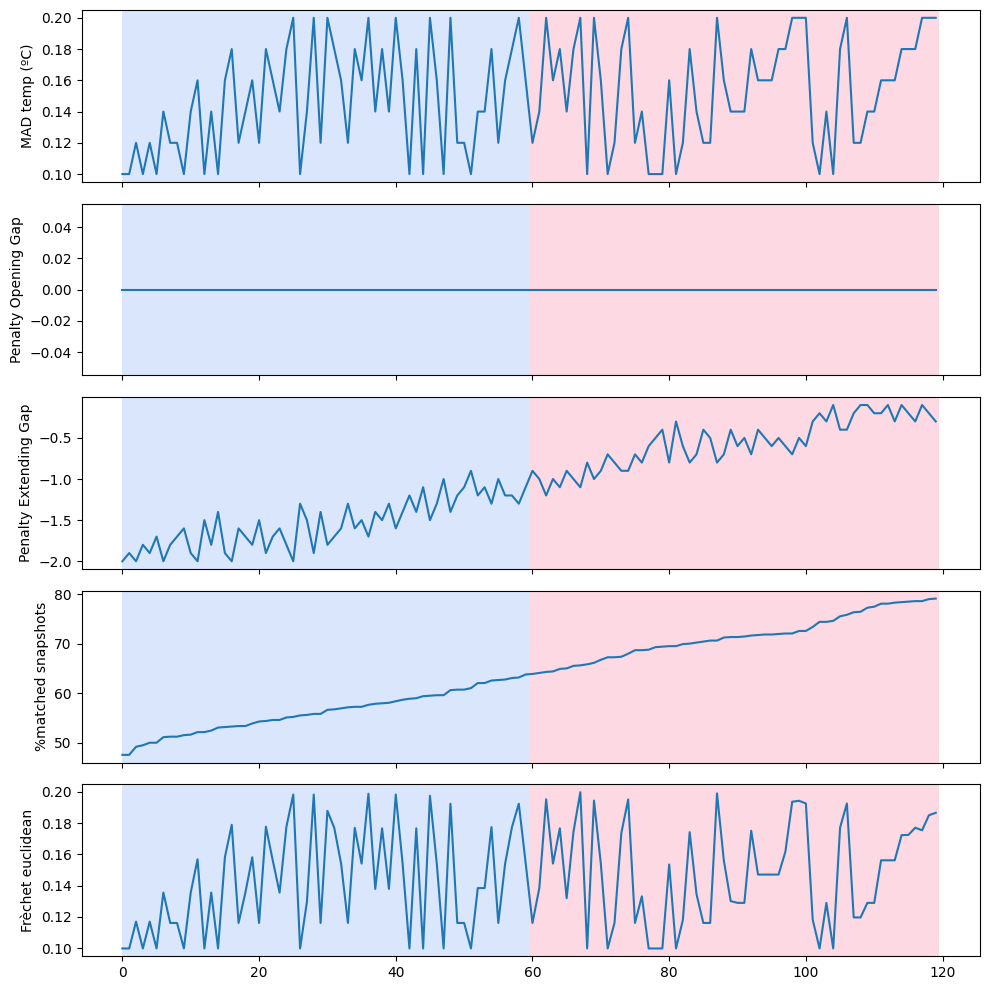

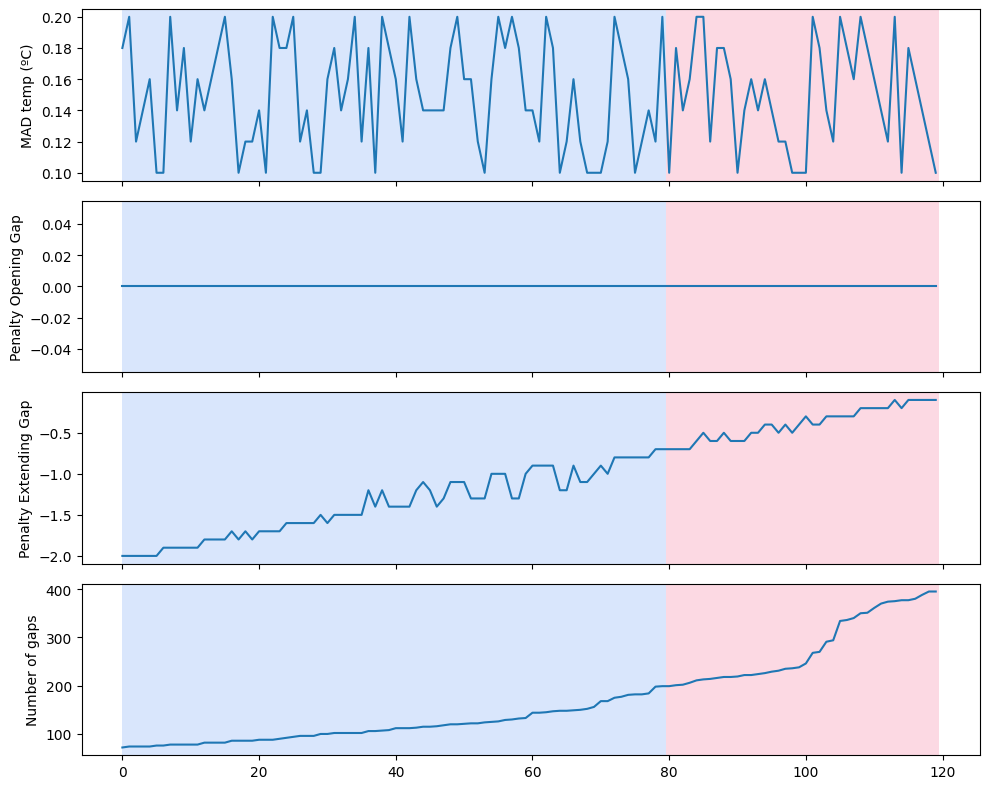

# Scenario 2P exp2 ht20 hg30 2P Modelexp2 ht20 hg30 Real


## Affine Gap


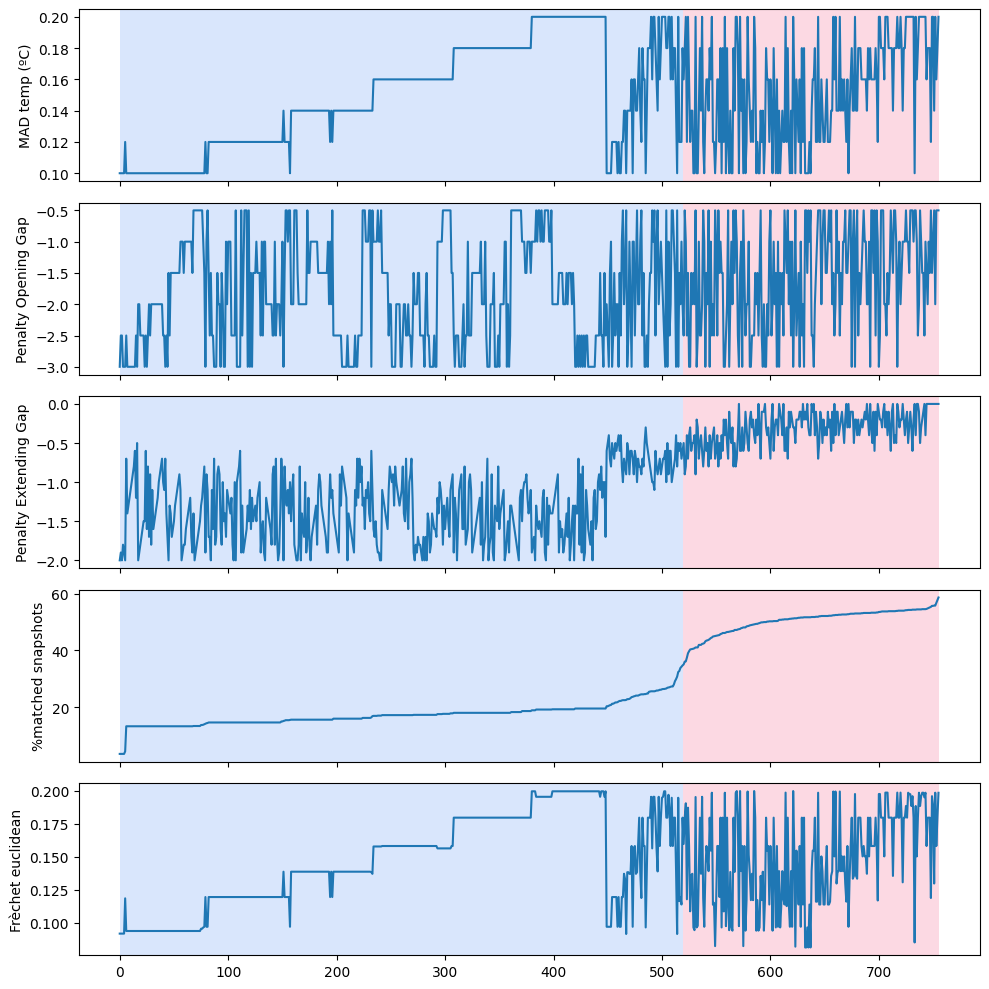

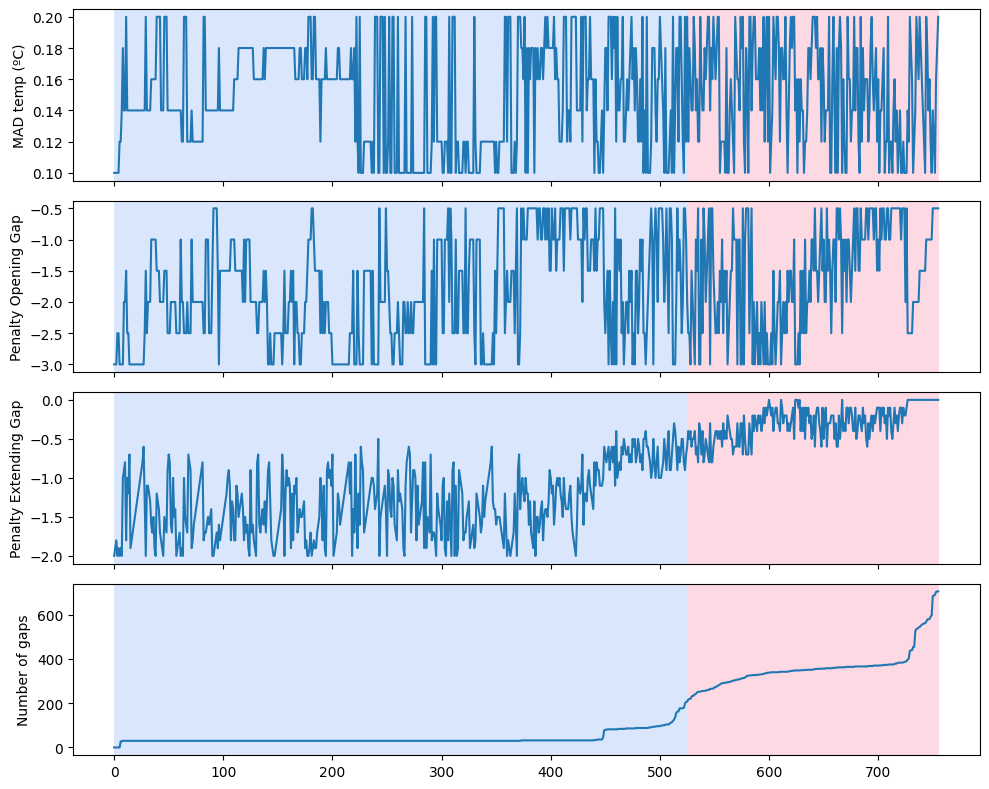

## Simple Gap


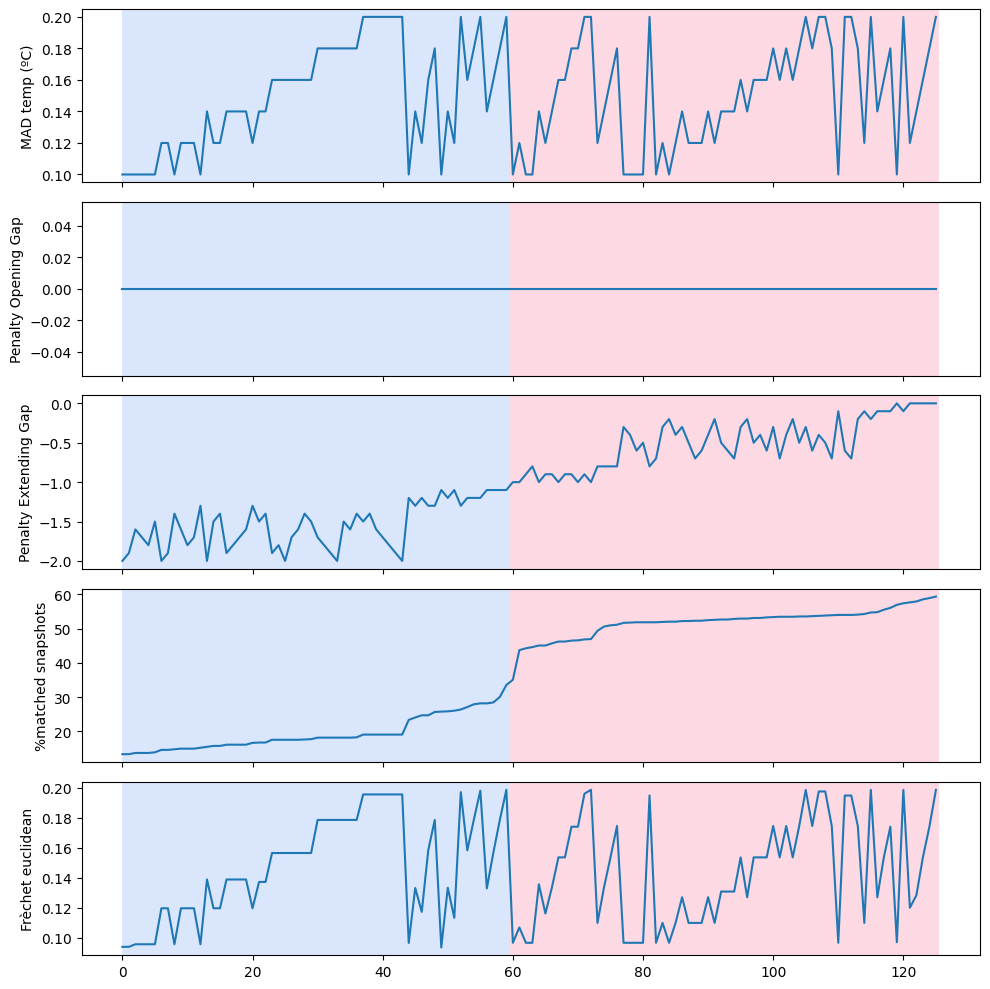

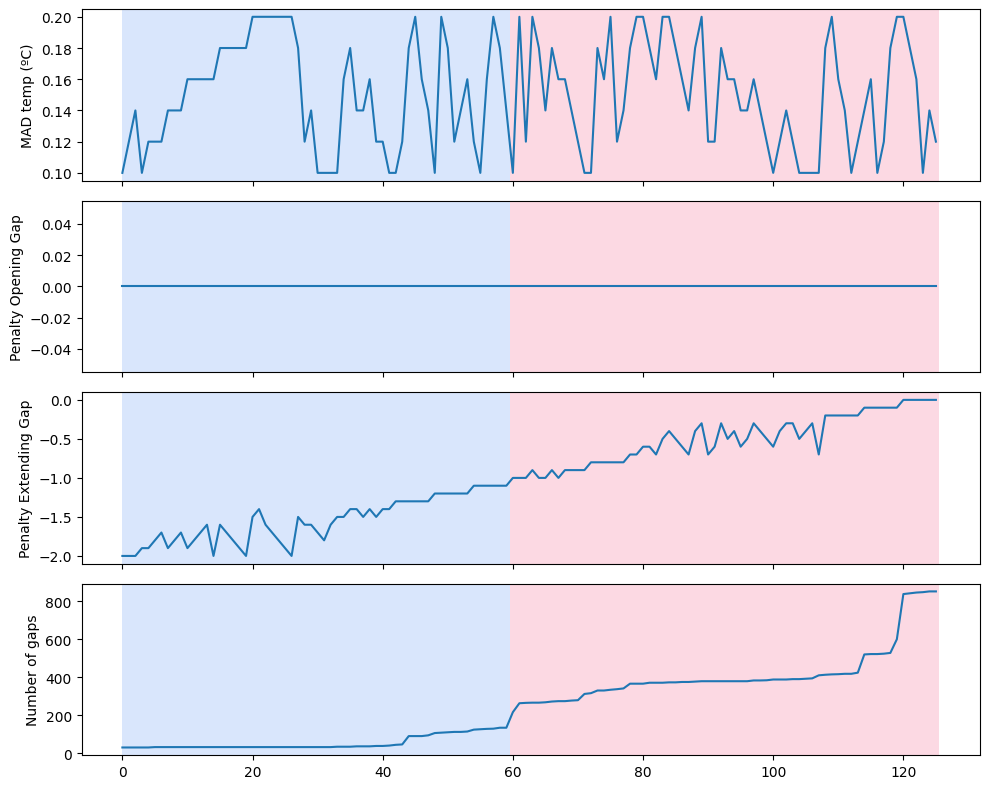

# Scenario 4P exp2 ht20 hg30 4P Modelexp2 ht20 hg30 Real


## Affine Gap


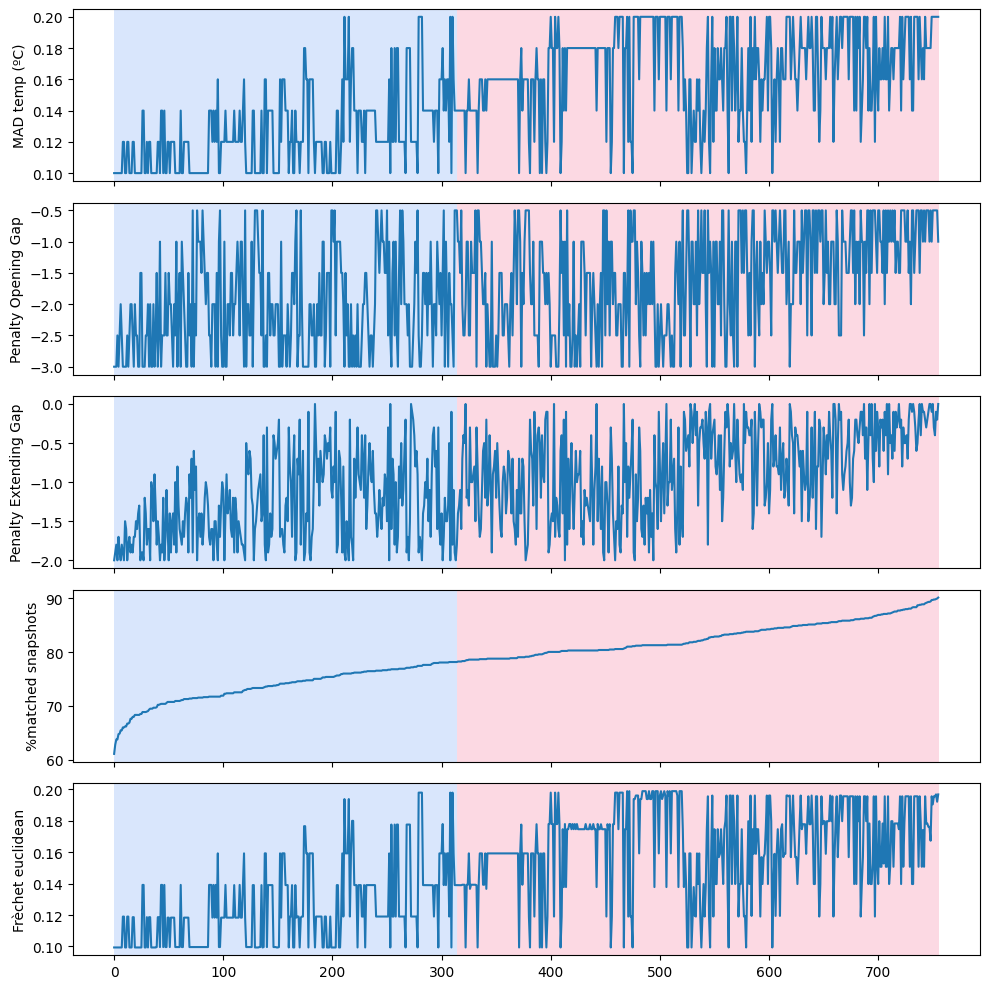

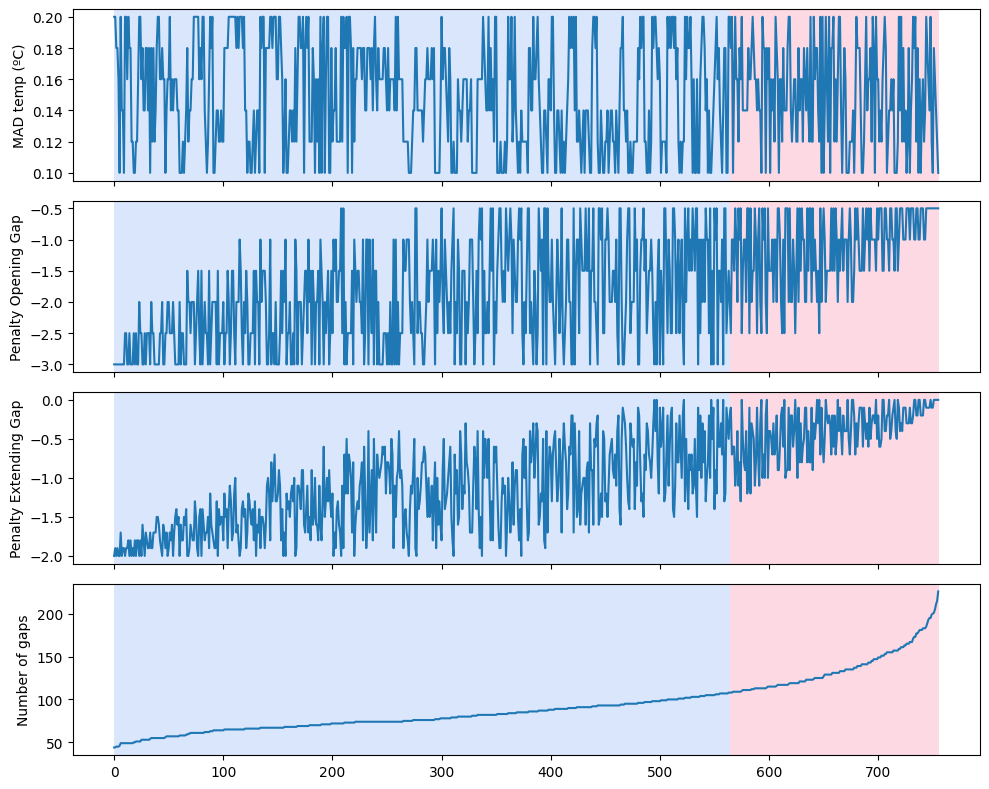

## Simple Gap


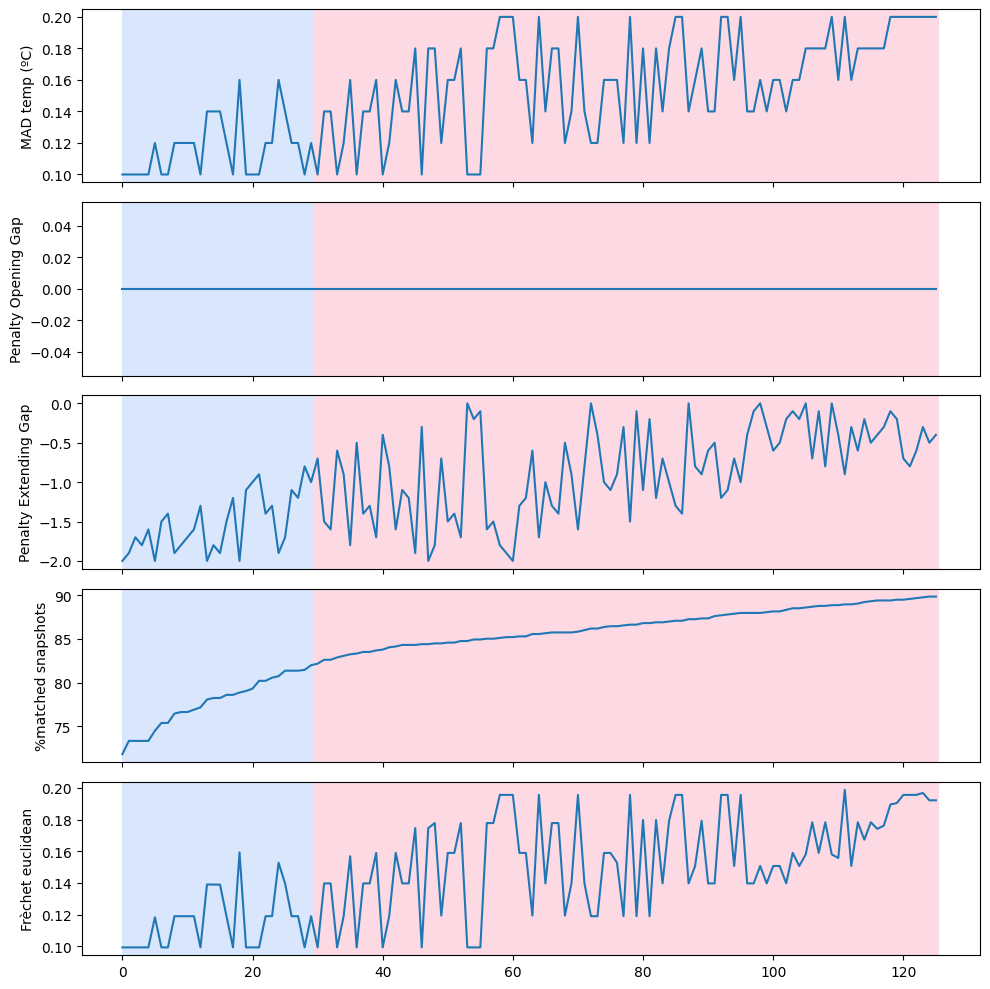

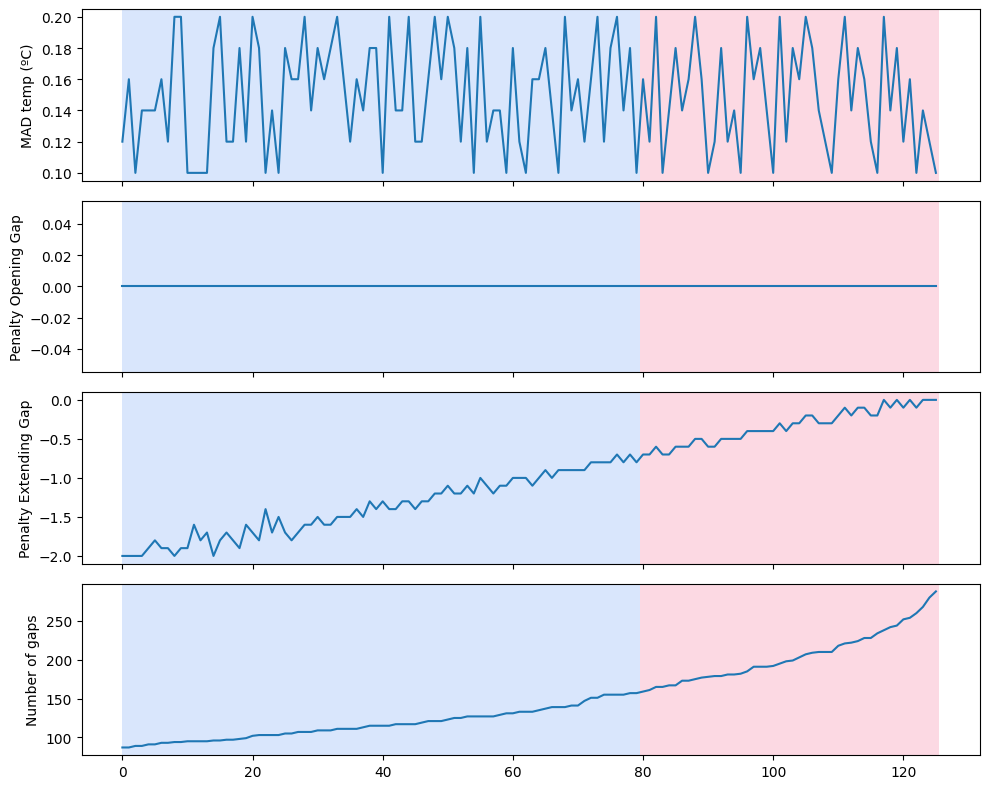

In [4]:
for file in files:
    display(Markdown(f'# Scenario {file.replace("_", " ").replace(".csv", "")}\n'))
    df = pd.read_csv(f'{output_directory}{file}')
    for gap_type, values in filters.items():
        display(Markdown(f'## {gap_type.capitalize()} Gap\n'))
        display(HTML(execute_regression(df, df[params[3]].quantile(0.75), param_interest).summary().as_html()))
        filtered_df = df[values[1](df[values[0]])]
        for index, ordering_param in enumerate(ordering_params):
            selected_params = generate_sublist(params, include_params[index])
            selected_label_params = generate_sublist(params_labels, include_params[index])

            signals, result = get_change_point(filtered_df,
                                               [selected_params[0], params[ordering_param]],
                                               selected_params, number_of_changes=1)
            _, axs = rpt.display(signals, result)

            for i, label in enumerate(selected_label_params):
                axs[i].set_ylabel(label)

            plt.tight_layout()
            plt.savefig(f'{output_directory}/output_{gap_type}_a_{os.path.splitext(file)[0]}.pdf', format='pdf')
            plt.show()